In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

# Exploratory Data Analysis

In [49]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [50]:
df.shape

(11251, 15)

In [51]:
col=df.columns
col

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [53]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [54]:
col=df.columns
col

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [57]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [60]:
col=df.columns
col

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [61]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [63]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# DATA VISUALIZATION

## Gender

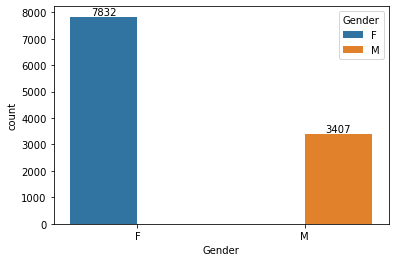

In [84]:
#plot the graph for male and gender from the data

ax = sns.countplot(data=df, x='Gender',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

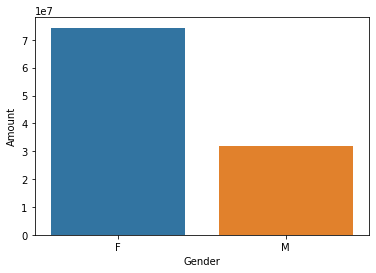

In [97]:
# plot the graph for gender vs Amount 

sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_gen, x='Gender', y='Amount')


From the above Graphs Women make more sales than men and purchase power is also greater for them.

## Age

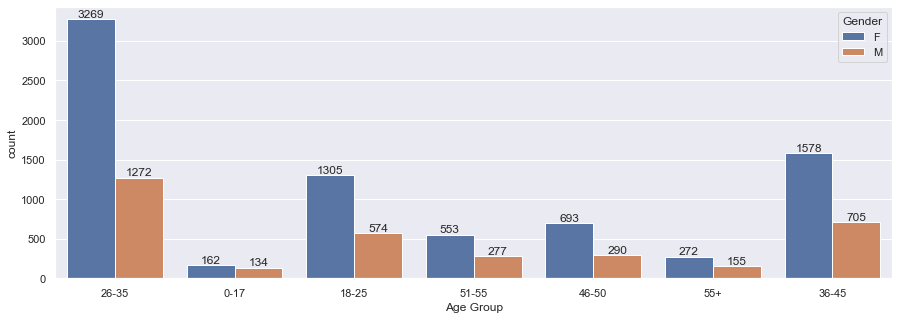

In [134]:
ax = sns.countplot(data=df, x='Age Group',hue='Gender')
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

*Age group from 26-32 are higest in number and Females are greater in number than Man*

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

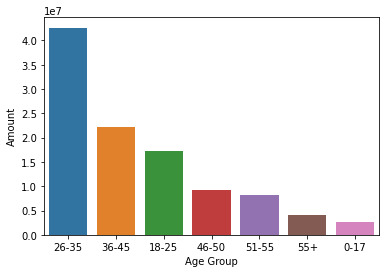

In [101]:
#total Amount vs Age Groups


sales_age_group= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data=sales_age_group,x='Age Group',y='Amount')


* From the above graph we can see that age Group of 26-32 makes more sales

## States

<AxesSubplot:xlabel='State', ylabel='Orders'>

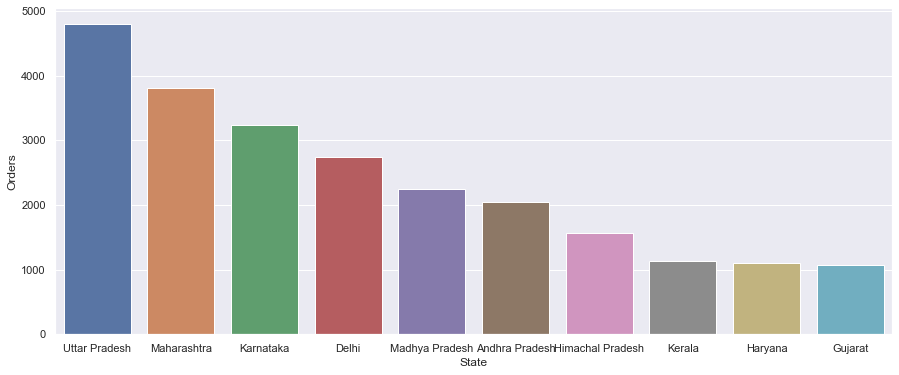

In [112]:
# Lets see the no.of orders for each state

State_order = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(data = State_order,x='State',y='Orders')

*  From the Graph UP ,MH and KA has the hightest number of Orders

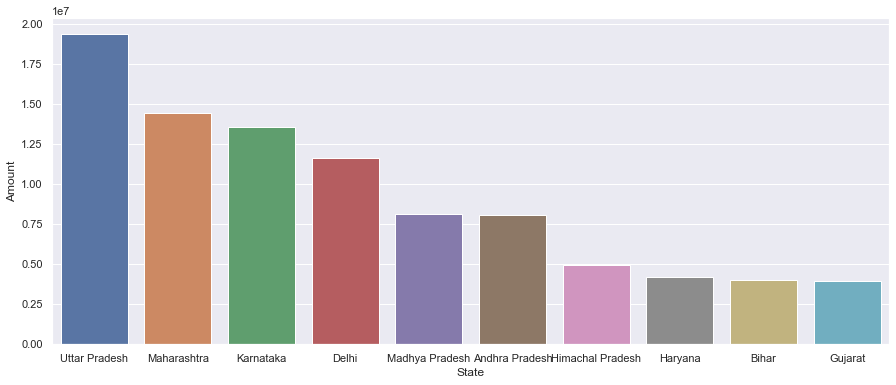

In [117]:
# Lets see sales Amount from each state

State_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=State_amount,x='State',y='Amount')
sns.set(rc={'figure.figsize':(15,6)})

## Martial Status

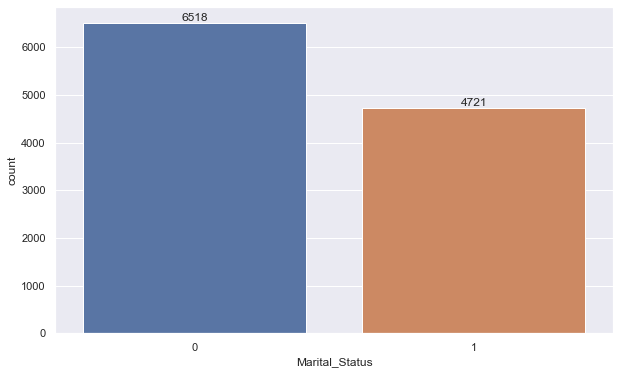

In [166]:
ax = sns.countplot(data = df , x = 'Marital_Status')
sns.set(rc={'figure.figsize':(11,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

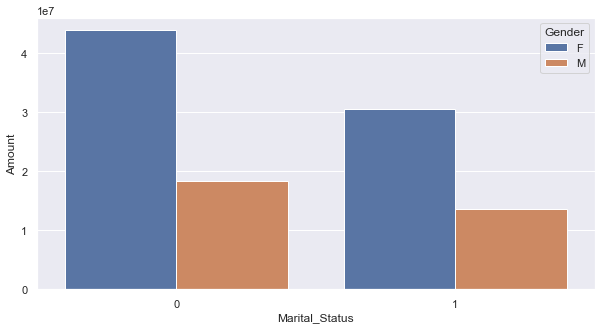

In [163]:
Sales_State=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(data=Sales_State, x='Marital_Status',y='Amount', hue='Gender')

## Occupation

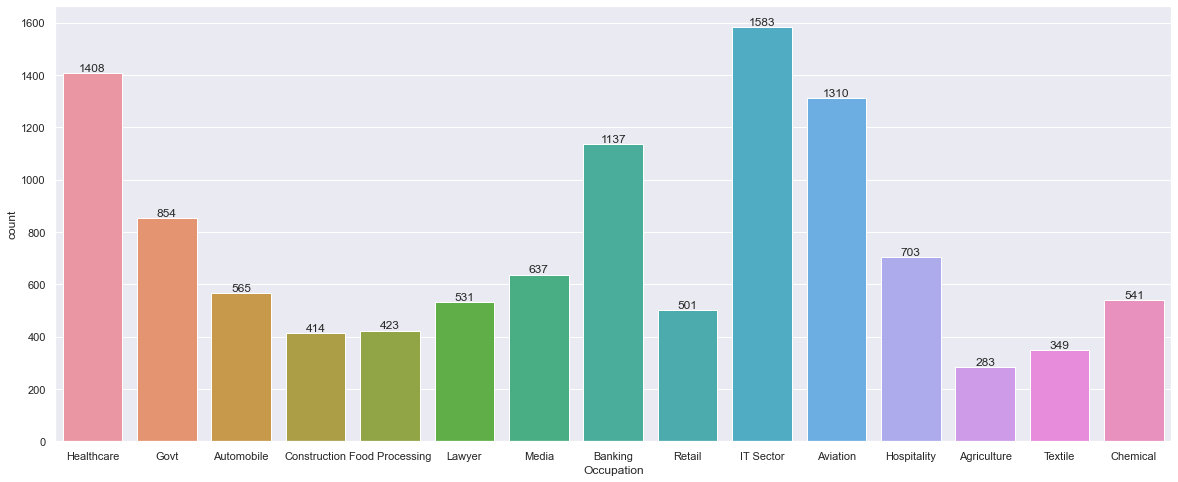

In [189]:
ax = sns.countplot(data=df,x='Occupation')

sns.set(rc={'figure.figsize':(20,5)})
 
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

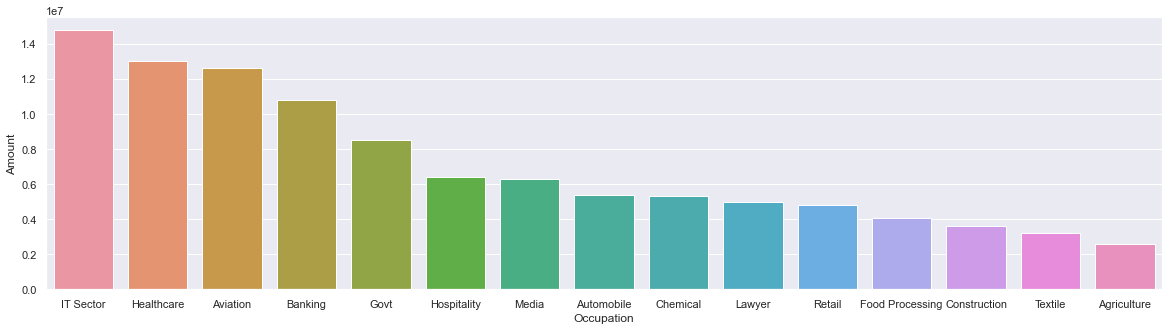

In [190]:
# lets see the amount vs Occupation

Sales_Occ= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_Occ,x='Occupation',y='Amount')

## Products

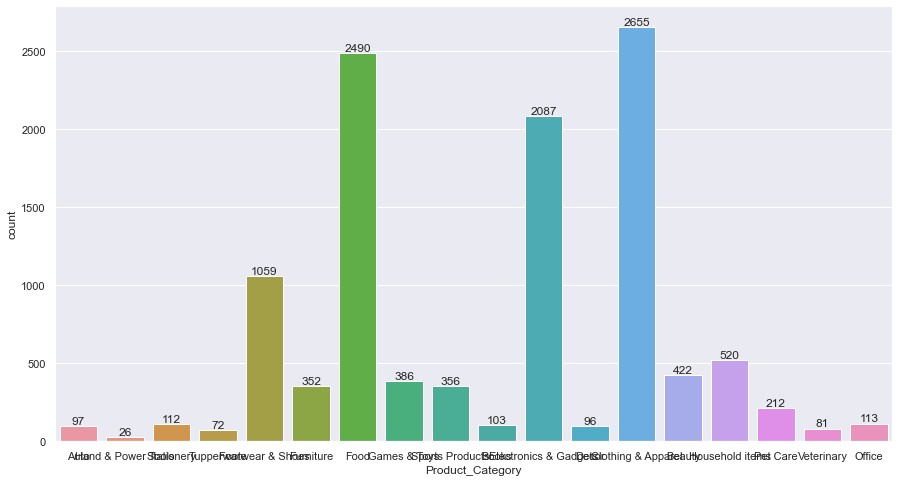

In [214]:
# Lets count the no of products

ax = sns.countplot(data=df, x='Product_Category')
sns.set(rc={'figure.figsize':(20,10)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

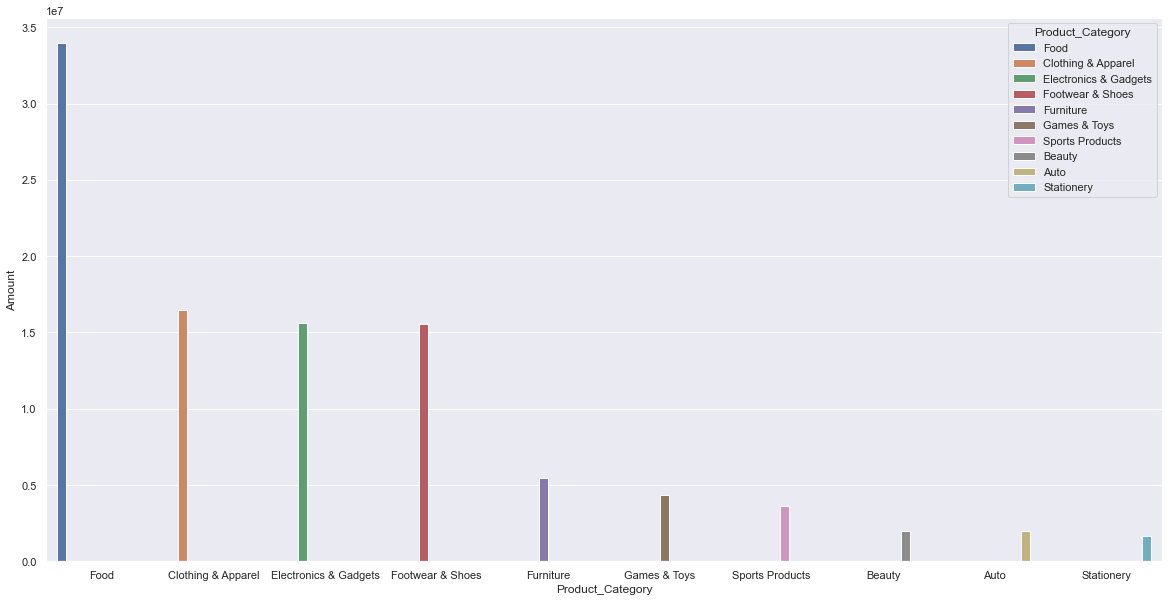

In [206]:
# Lets see sales of each Product

Product_Sales= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=Product_Sales,x='Product_Category',y='Amount',hue='Product_Category')

## Order of each Product

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

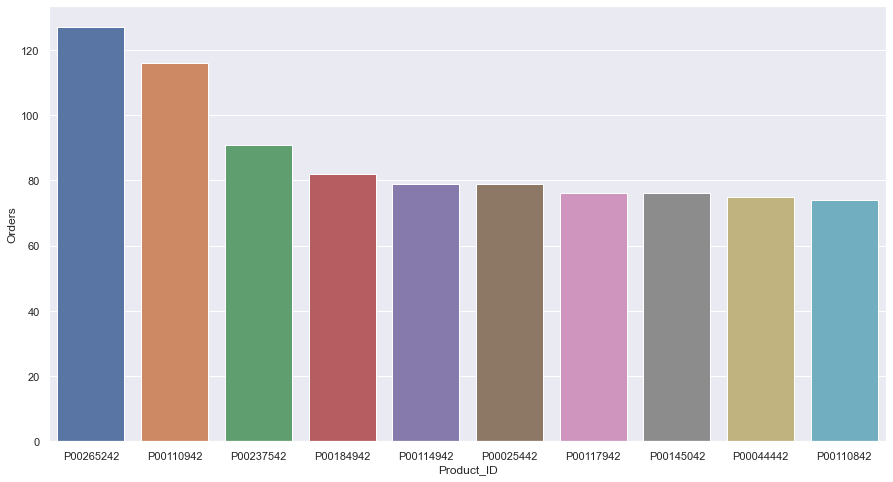

In [211]:
Order_product=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=Order_product,x='Product_ID',y='Orders')

<AxesSubplot:xlabel='Product_ID'>

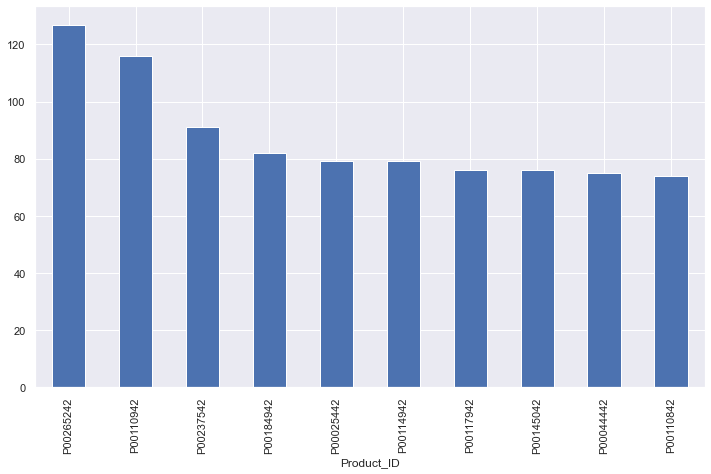

In [212]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion

* Womens are greater in sales and count then Men.
* 26-35 is the Age group which is highest in number and in Sale amount.
* UP ,MH and KA has the hightest number of Orders.
* IT Sector, Healthcare and Aviation are the Occupations high in sales.
* Food,Clothing and Apparel are the products which has higest number of sales.
